# Image Resizing Functions

The VGG-16 and GoogLeNet pretrained networks need the images to be 224x224 pixles the recommendation from comment threads is to start with 255x255 and wither crop or resize the image from there. The first resizing function simply works through a given image directory or list of directories and resizes the images without worry about aspect ratio.

In [16]:
import os
from PIL import Image
from __future__ import division

In [11]:
in_dir1 = "E:/erikn/Dropbox (DATA698-S17)/DATA698-S17/data/ddsm/png/0/"
in_dir2 = "E:/erikn/Dropbox (DATA698-S17)/DATA698-S17/data/ddsm/png/1/"
in_dir3 = "E:/erikn/Dropbox (DATA698-S17)/DATA698-S17/data/ddsm/png/3/"

img_in = [in_dir1, in_dir2, in_dir3]

out_dir = "E:/erikn/Documents/GitHub/MLProjects/data698_images/small/"

In [3]:
def basic_resize(height, width, in_dir, out_dir):
    # Takes a directory or list of directories containing png images and resizes to the given height and width 
    for directory in in_dir:
        images = os.listdir(directory)
        for img in images:
            im = Image.open(os.path.join(directory, img))
            size = im.resize((width,height), resample=Image.LANCZOS)
            size.save(os.path.join(out_dir, img))

In [5]:
height = 255
width = 255
basic_resize(height, width, img_in, out_dir)

The next resizing function is designed to maintain the aspect ratio of the image while doing the resize. You can selecct the desired height and the function adds in black rows to the edges of the image to make all images the same size then resizes the image to desired size.

In [9]:
from scipy import misc
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [12]:
# Finds the Maximum height and width from all of the images from the first run we have 
# Max Height = 7111
# Max Width = 5641
# Count = 4005
height = 0
width = 0
count = 0

start = time.time()
for directory in img_in:
    images = os.listdir(directory)
    for img in images:
        im = misc.imread(os.path.join(directory, img), flatten=False, mode='L')
        if im.shape[0] > height:
            height = im.shape[0]
        if im.shape[1] > width:
            width = im.shape[1]
        count += 1

print("Max Height, Max Width, Number of Images")
print(height, width, count)
end = time.time()
print("Time taken:")
print(end - start)

Max Height, Max Width, Number of Images
(7111L, 5641L, 4005)
Time taken:
758.839999914


Loading a test image

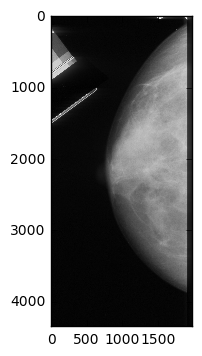

In [13]:
img_in = ["E:/erikn/Documents/GitHub/MLProjects/data698_images/png/"] # This is a test set use the img_in from above for all images
images = os.listdir(img_in[0])
im = Image.open(os.path.join(img_in[0], images[0]))
img_w, img_h = im.size
plt.imshow(im,cmap = plt.get_cmap('gray'))

Placing an image in the maximum size box for all images.

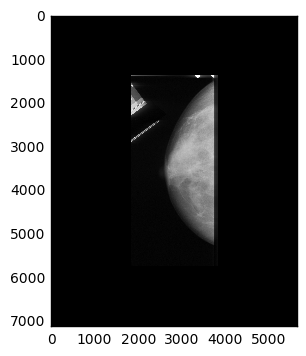

In [17]:
background = Image.new('L', (5641, 7111), (0))
bg_w, bg_h = background.size
offset = ((bg_w - img_w) // 2, (bg_h - img_h) // 2) # Use // division in Python 3.5 
background.paste(im, offset)
plt.imshow(background,cmap = plt.get_cmap('gray'))

Resizing the Image to a given height and then placing in a square box.

(400, 182)


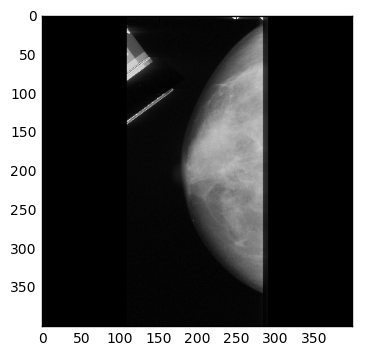

In [23]:
height = 400
width = int((height/img_h)*img_w)
print(height,width)
size = im.resize((width,height), resample=Image.LANCZOS)
background = Image.new('L', (height,height), (0))
bg_w, bg_h = background.size
offset = ((bg_w - width) // 2, (bg_h - height) // 2) # Use // division in Python 3.5 
background.paste(size, offset)
plt.imshow(background,cmap = plt.get_cmap('gray'))

## Creating an Aspect Ratio Resizer

In [35]:
def aspect_resize(height, in_dir, out_dir, square):
    for directory in in_dir:
        images = os.listdir(directory)
        for img in images:
            im = Image.open(os.path.join(directory, img))
            img_w, img_h = im.size
            if square == True:
                width = width = int((height/img_h)*img_w)
                size = im.resize((width,height), resample=Image.LANCZOS)
                background = Image.new('L', (height,height), (0))
                bg_w, bg_h = background.size
                offset = ((bg_w - width) // 2, (bg_h - height) // 2) # Use // division in Python 3.5 
                background.paste(size, offset)
            else:
                width = int((height/im.size[1])*im.size[0])
                background = im.resize((width,height), resample=Image.LANCZOS)
            background.save(os.path.join(out_dir, img))    

In [38]:
img_in = ["E:/erikn/Documents/GitHub/MLProjects/data698_images/png/"] # This is a test set use the img_in from above for all images
img_out = "E:/erikn/Documents/GitHub/MLProjects/data698_images/non_square/"
height = 150
aspect_resize(height,img_in, img_out, False)

In [39]:
img_in = ["E:/erikn/Documents/GitHub/MLProjects/data698_images/png/"] # This is a test set use the img_in from above for all images
img_out = "E:/erikn/Documents/GitHub/MLProjects/data698_images/square/"
height = 150
aspect_resize(height,img_in, img_out, True)